## 1. Ovreview of images

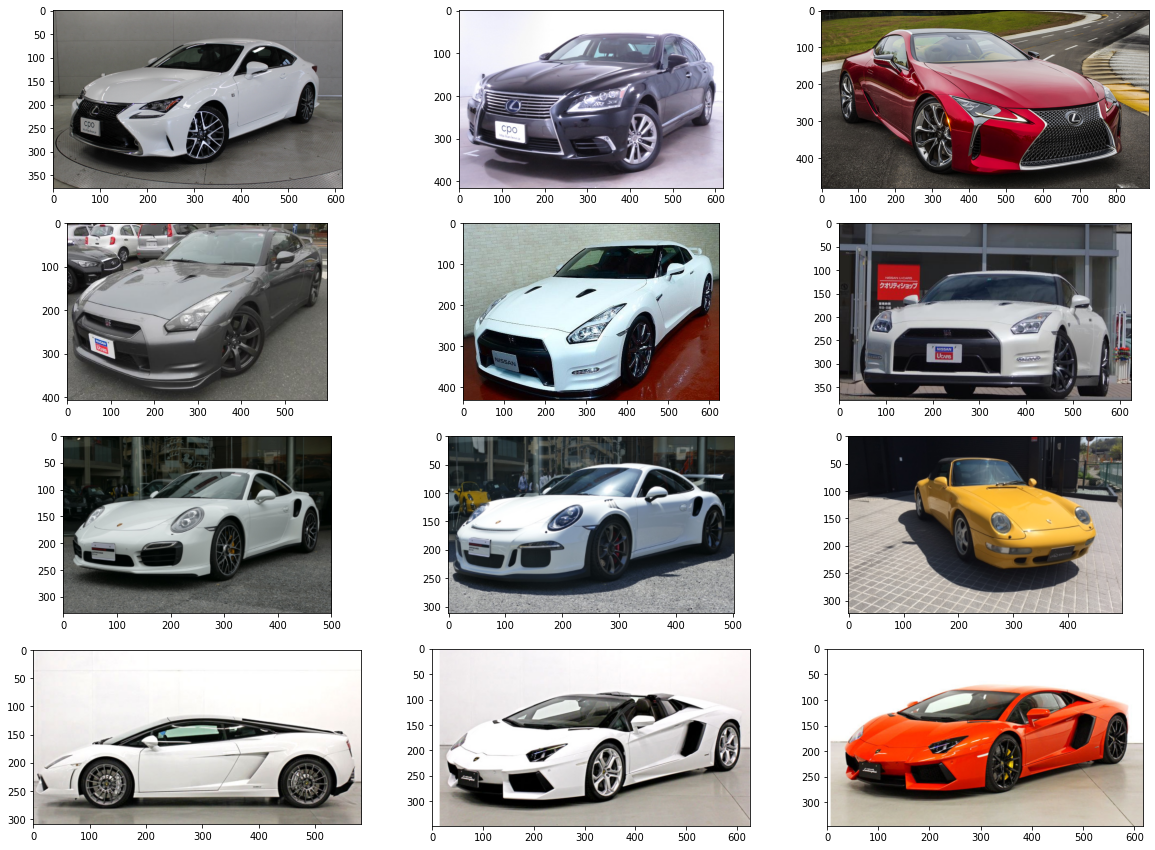

In [0]:
# Read Images
imm = []
for image in pred :   
    im= mpimg.imread(image)
    imm.append(im)
plt.figure(figsize=(20,15))

for i in range(len(imm)):
    plt.subplot(4,3, i+1)
    plt.imshow(imm[i]) 

##  2. Import library

In [0]:
!pip install tf-nightly 

In [0]:
import os
import h5py
import numpy as np
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions

from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Lambda, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

import time
import glob
import json
import csv
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm

from IPython.display import Image
%matplotlib inline

tf.__version__

'2.3.0-dev20200605'

## 3. Prepare dataset

In [0]:
# load training data of A
images = glob.glob('GTR/train/LEX/*')
trainA=[]
for image in images:
    trainA.append(image)
#print(trainA)

# Read A Images
trainAim = []
#from keras.preprocessing import image
for images in trainA: 
    img = load_img(images, target_size=(224, 224))
    x = img_to_array(img)
    trainAim.append(x)
print(np.shape(trainAim))   


(100, 224, 224, 3)


In [0]:
# load training data of B
images = glob.glob('GTR/train/GTR/*')
trainB=[]
for image in images:
    trainB.append(image)

# Read B Images
trainBim = []
for images in trainB: 
    img = load_img(images, target_size=(224, 224))
    x = img_to_array(img)
    trainBim.append(x)
print(np.shape(trainBim))   

(100, 224, 224, 3)


In [0]:
# load training data of C
images = glob.glob('GTR/train/POR/*')
trainC=[]
for image in images:
    trainC.append(image)

# Read C Images
trainCim = []
for images in trainC: 
    img = load_img(images, target_size=(224, 224))
    x = img_to_array(img)
    trainCim.append(x)
print(np.shape(trainCim))   

(100, 224, 224, 3)


In [0]:
# load training data of D
images = glob.glob('GTR/train/LAM/*')
trainD=[]
for image in images:
    trainD.append(image)

# Read D Images
trainDim = []
for images in trainD: 
    img = load_img(images, target_size=(224, 224))
    x = img_to_array(img)
    trainDim.append(x)
print(np.shape(trainDim))   


(100, 224, 224, 3)


In [0]:
# load validation data of A
images = glob.glob('GTR/validation/LEX/*')
validationA=[]
for image in images:
    validationA.append(image)

# Read A Images
validationAim = []
for images in validationA: 
    img = load_img(images, target_size=(224, 224))
    x = img_to_array(img)
    validationAim.append(x)
print(np.shape(validationAim))   

(20, 224, 224, 3)


In [0]:
# load validation data of B
images = glob.glob('GTR/validation/GTR/*')
validationB=[]
for image in images:
    validationB.append(image)

# Read B Images
validationBim = []
for images in validationB: 
    img = load_img(images, target_size=(224, 224))
    x = img_to_array(img)
    validationBim.append(x)
print(np.shape(validationBim))   

(20, 224, 224, 3)


In [0]:
# load validation data of C
images = glob.glob('GTR/validation/POR/*')
validationC=[]
for image in images:
    validationC.append(image)

# Read C Images
validationCim = []
for images in validationC: 
    img = load_img(images, target_size=(224, 224))
    x = img_to_array(img)
    validationCim.append(x)
print(np.shape(validationCim))   

(20, 224, 224, 3)


In [0]:
# load validation data of D
images = glob.glob('GTR/validation/LAM/*')
validationD=[]
for image in images:
    validationD.append(image)

# Read D Images
validationDim = []
for images in validationD: 
    img = load_img(images, target_size=(224, 224))
    x = img_to_array(img)
    validationDim.append(x)
print(np.shape(validationDim))   

(20, 224, 224, 3)


In [0]:
#Create train data
X_train = np.vstack((trainAim,trainBim,trainCim,trainDim))
X_test= np.vstack((validationAim,validationBim,validationCim,validationDim))

#print(X_test[0])
print(np.shape(X_train))
print(np.shape(X_test))

X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)
#print(X_test[0])

print(np.shape(X_train))
print(np.shape(X_test))

(400, 224, 224, 3)
(80, 224, 224, 3)
(400, 224, 224, 3)
(80, 224, 224, 3)


In [0]:
#Create label data
n=4
y_train = np.hstack((np.zeros(len(X_train)//n), np.ones(len(X_train)//n), np.ones(len(X_train)//n)*2, np.ones(len(X_train)//n)*3))
y_test =  np.hstack((np.zeros(len(X_test)//n), np.ones(len(X_test)//n), np.ones(len(X_test)//n)*2, np.ones(len(X_test)//n)*3))

In [0]:
print(np.shape(y_train))
print(np.shape(y_test ))

y_test

(400,)
(80,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

## 4. Extract features by EfficientNet

In [0]:
# 3.Extract features by EfficientNet and train FC model
# create the base pre-trained model

base_model = EfficientNetB0(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output  #4d
print(np.shape(x))
x = GlobalAveragePooling2D()(x)  #2d
print(np.shape(x))
x = Dense(64, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized, i.e. freeze all convolutional layers
for layer in base_model.layers:
    layer.trainable = False

model.summary()

(None, None, None, 1280)
(None, 1280)
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, None, None, 3 7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization[0][0]              
_________________________________________________

In [0]:
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

t=time.time()

# train the model on the new data 
history=model.fit(X_train, y_train, validation_data=(X_test, y_test) , epochs=20, batch_size=32, shuffle=True)

t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict')

Epoch 1/20
13/13 [==============================] - 3s 194ms/step - loss: 1.1570 - accuracy: 0.5550 - val_loss: 0.9283 - val_accuracy: 0.6500
Epoch 2/20
13/13 [==============================] - 1s 67ms/step - loss: 0.6263 - accuracy: 0.8225 - val_loss: 0.5824 - val_accuracy: 0.8000
Epoch 3/20
13/13 [==============================] - 1s 68ms/step - loss: 0.3905 - accuracy: 0.8750 - val_loss: 0.4739 - val_accuracy: 0.8125
Epoch 4/20
13/13 [==============================] - 1s 67ms/step - loss: 0.2628 - accuracy: 0.9400 - val_loss: 0.4216 - val_accuracy: 0.8625
Epoch 5/20
13/13 [==============================] - 1s 67ms/step - loss: 0.2083 - accuracy: 0.9650 - val_loss: 0.4009 - val_accuracy: 0.8250
Epoch 6/20
13/13 [==============================] - 1s 67ms/step - loss: 0.1738 - accuracy: 0.9650 - val_loss: 0.3681 - val_accuracy: 0.8750
Epoch 7/20
13/13 [==============================] - 1s 67ms/step - loss: 0.1346 - accuracy: 0.9775 - val_loss: 0.3886 - val_accuracy: 0.9000
Epoch 8/20
1

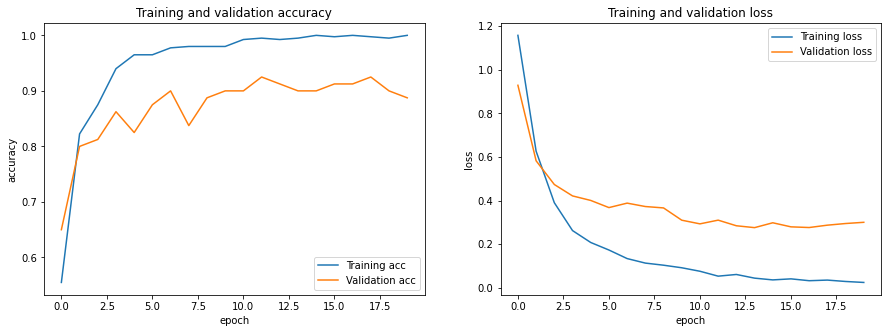

In [0]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
            
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.show()

## 5. Obtain prediction on new images

In [0]:
# load prediction data 
images = glob.glob('GTR/predict/*')
pred=[]
for image in images:
    pred.append(image)

# Read prediction Images
prediction = []
for imm in pred: 
    img = load_img(imm, target_size=(224, 224))
    x = img_to_array(img)
    prediction.append(x)
print(np.shape(prediction))   

(12, 224, 224, 3)


In [0]:
prediction1=np.array(prediction)
prediction2 = preprocess_input(prediction1)
predictions3 = model.predict(prediction2)
print(np.argmax(predictions3, axis=1))


[0 0 0 1 1 1 2 2 2 3 3 3]


In [0]:
predictions = model.predict(X_test)
pre1=np.argmax(predictions, axis=1)
pre2=[x for i,x in enumerate(pre1) if x==y_test[i]]
print("accuracy",len(pre2)/80)

print("prediction", pre1)
print("label_data", np.array(y_test).astype(int))

accuracy 0.8875
prediction [0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 1 2 3 1 2 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 0 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 2 3 3 3 3 3
 3 3 3 3 3 3]
label_data [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]


In [0]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 32ms/step - loss: 0.3007 - accuracy: 0.8875


[0.3007441461086273, 0.887499988079071]

 # 6. Check how the model sees images

In [0]:
model_builder = model
img_size = (224, 224)
#preprocess_input = tf.keras.applications.efficientnet.preprocess_input
#decode_predictions = tf.keras.applications.efficientnet.decode_predictions

last_conv_layer_name = "top_activation"
classifier_layer_names = [
    "global_average_pooling2d",
    "dense",
    "dense_1"
]

# The local path to our target image

img_path = "GTR/predict/LAMP1.png"
   
#display(Image(img_path))

In [0]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

(1, 4)


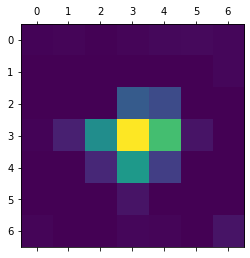

In [0]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Print what the top predicted class is
preds = model.predict(img_array)
print(preds.shape)
#print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()

In [0]:
img_path=pred
vision=[]

# We load the original image
for i in range(len(img_path)):
  img = load_img(img_path[i])
  img = img_to_array(img)
  #print(img)
# We rescale heatmap to a range 0-255
  heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
  jet = cm.get_cmap("jet")

# We use RGB values of the colormap
  jet_colors = jet(np.arange(256))[:, :3]
  jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
  jet_heatmap = array_to_img(jet_heatmap)
  jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
  jet_heatmap = img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
  superimposed_img = jet_heatmap * 0.4 + img
  superimposed_img = array_to_img(superimposed_img)

# Save the superimposed image
  save_path = 'car{0}.png'.format(i)
  #print(save_path)
  vision.append(save_path)
  superimposed_img.save(save_path)

# Display Grad CAM
#  display(Image(save_path))


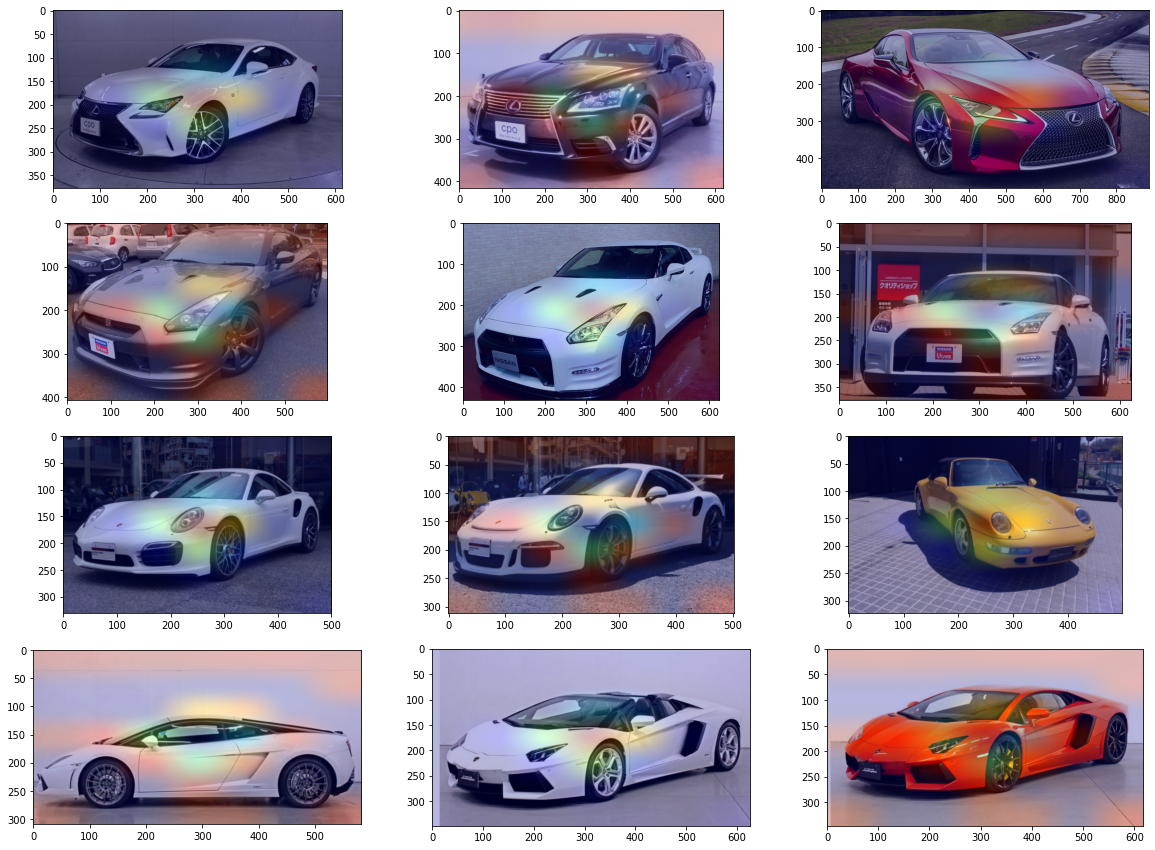

In [0]:
# Read Images
imm = []
for image in vision :   
    im= mpimg.imread(image)
    imm.append(im)
plt.figure(figsize=(20,15))

for i in range(len(imm)):
    plt.subplot(4,3, i+1)
    plt.imshow(imm[i]) 

In [0]:
!nvidia-smi

Sat Jun  6 02:12:07 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    28W /  70W |   2683MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  